# DS2000 Rigol Waveform Examples

**Scott Prahl**

**March 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfm as rigol

except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")
    
repo = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/"

def read_rigol_csv(name):
    csv_data = np.genfromtxt(name, delimiter=',', skip_header=2).T
    lines = len(csv_data[0])
    offset, scale = np.genfromtxt(name, delimiter=',', skip_header=1, skip_footer=lines, usecols=(3, 4)).T
    csv_data[0] = offset + scale * csv_data[0]
    return csv_data


## Introduction

This notebook demonstrates extracting signals from `.wfm` files created by Rigol DS2000 oscilloscopes.  It also validates that the process works by comparing with `.csv` and screenshots.

The list of Rigol scopes that should produce the same file format are:

In [2]:
print(rigol.DS2000_scopes)

['2', '2000', 'DS2000', 'DS2072A', 'DS2102A', 'MSO2102A', 'MSO2102A-S', 'DS2202A', 'MSO2202A', 'MSO2202A-S', 'DS2302A', 'MSO2302A', 'MSO2302A-S']


## DS2000-A

### Look at a screen shot

Start with a `.wfm` file from a Rigol DS2000 scope.  It should look something like this

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS2000-A.png" width="40%">

### Look at the data in the `.csv` file

First let's look at plot of the data from the corresponding `.csv` file. Unfortunately this wfm file did not come
with a `.csv` file generated by the Rigol oscilloscope.  Instead, the `.csv` was generated by RigolWFM and
verifies that the `.csv` generation matches that expected.

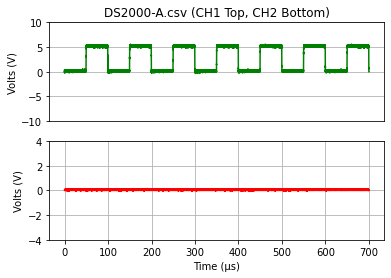

In [3]:
filename = "DS2000-A.csv"

csv_data = np.genfromtxt(repo+filename, delimiter=',', skip_header=2).T

plt.subplot(211)
plt.plot(csv_data[0]*1e6,csv_data[1], color='green')
plt.title(filename + " (CH1 Top, CH2 Bottom)")
plt.ylabel("Volts (V)")
plt.ylim(-10,10)
plt.grid(True)
plt.xticks([])

plt.subplot(212)
plt.plot(csv_data[0]*1e6,csv_data[2], color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.grid(True)
plt.ylim(-4,4)

plt.show()

### Now for the `.wfm` data

First a textual description.

In [4]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS2000-A.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '2000')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS2000-A.wfm?raw=true'
    General:
        File Model   = wfm2000
        User Model   = 2000
        Parser Model = wfm2000
        Firmware     = 00.03.00.01.03
        Filename     = DS2000-A.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =       DC
            Scale =     5.00  V/div
           Offset =     0.00  V
            Probe =      10X
         Inverted =    False

        Time Base =   50.000 µs/div
           Offset = -199.200 µs
            Delta =    1.000 ns/point
           Points =   700000

         Count    = [        1,        2,        3  ...    699999,   700000]
           Raw    = [      128,      127,      129  ...       128,      128]
           Times  = [-549.200 µs,-549.199 µs,-549.198 µs  ... 150.799 µs,150.800 µs]
           Volts  = [200.00 mV, -0.00  V,400.00 mV  ... 200.00 mV,200.00 mV]

     Channel 2:
         Coupling =       DC
            Scale =     2.00  V/

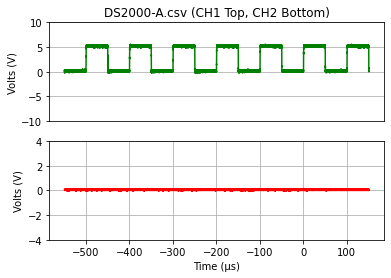

In [5]:
ch = w.channels[0]
plt.subplot(211)
plt.plot(ch.times*1e6, ch.volts, color='green')
plt.title(filename + " (CH1 Top, CH2 Bottom)")
plt.ylabel("Volts (V)")
plt.ylim(-10,10)
plt.grid(True)
plt.xticks([])

ch = w.channels[1]
plt.subplot(212)
plt.plot(ch.times*1e6, ch.volts, color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.ylim(-4,4)
plt.grid(True)

plt.show()

## DS2000-B

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS2000-B.png" width="40%">


### First the `.csv` data

Let's look at what the accompanying `.csv` data looks like.


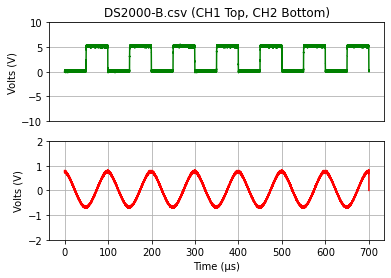

In [6]:
filename = "DS2000-B.csv"

# unfortunately this csv file was generated by RigolWFM and by not the scope itself
csv_data = np.genfromtxt(repo+filename, delimiter=',', skip_header=2).T

plt.subplot(211)
plt.plot(csv_data[0]*1e6,csv_data[1], color='green')
plt.title(filename + " (CH1 Top, CH2 Bottom)")
plt.ylabel("Volts (V)")
plt.ylim(-10,10)
plt.grid(True)
plt.xticks([])

plt.subplot(212)
plt.plot(csv_data[0]*1e6,csv_data[2], color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.grid(True)
plt.ylim(-2,2)

plt.show()

### Now for the `wfm` data

First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled.

In [7]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS2000-B.wfm" + "?raw=true"  

w = rigol.Wfm.from_url(wfm_url, 'DS2000')
description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS2000-B.wfm?raw=true'
    General:
        File Model   = wfm2000
        User Model   = DS2000
        Parser Model = wfm2000
        Firmware     = 00.03.00.01.03
        Filename     = DS2000-B.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =       DC
            Scale =     5.00  V/div
           Offset =    -5.00  V
            Probe =      10X
         Inverted =    False

        Time Base =   50.000 µs/div
           Offset = -199.200 µs
            Delta =    1.000 ns/point
           Points =   700000

         Count    = [        1,        2,        3  ...    699999,   700000]
           Raw    = [      103,      102,      103  ...       103,      103]
           Times  = [-549.200 µs,-549.199 µs,-549.198 µs  ... 150.799 µs,150.800 µs]
           Volts  = [200.00 mV,  0.00  V,200.00 mV  ... 200.00 mV,200.00 mV]

     Channel 2:
         Coupling =       DC
            Scale =     1.00  

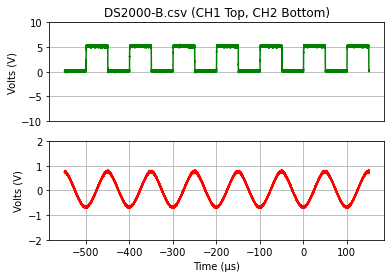

In [8]:
ch = w.channels[0]
plt.subplot(211)
plt.plot(ch.times*1e6, ch.volts, color='green')
plt.title(filename + " (CH1 Top, CH2 Bottom)")
plt.ylabel("Volts (V)")
plt.ylim(-10,10)
plt.grid(True)
plt.xticks([])

ch = w.channels[1]
plt.subplot(212)
plt.plot(ch.times*1e6, ch.volts, color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.ylim(-2,2)
plt.grid(True)

plt.show()

## DS2072A-1

### Look at a screen shot

Start with a `.wfm` file from a Rigol DS2072 scope.  Evidently the image capture on these scopes is buggy and shows no traces.  However, it does show the time scale and that both channels were active

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS2072A-1.png" width="40%">

### Look at the data in the `.csv` file

First let's look at plot of the data from the corresponding `.csv` file. 

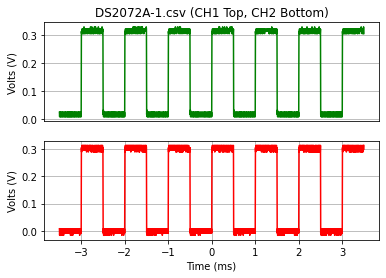

In [9]:
filename = "DS2072A-1.csv"

csv_data = read_rigol_csv(repo+filename)

plt.subplot(211)
plt.plot(csv_data[0]*1e3,csv_data[1], color='green')
plt.title(filename + " (CH1 Top, CH2 Bottom)")
plt.ylabel("Volts (V)")
plt.grid(True)
plt.xticks([])

plt.subplot(212)
plt.plot(csv_data[0]*1e3,csv_data[2], color='red')
plt.xlabel("Time (ms)")
plt.ylabel("Volts (V)")
plt.grid(True)

plt.show()

### Now for the `.wfm` data

First a textual description.

In [10]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS2072A-1.wfm" + "?raw=true"  
w = rigol.Wfm.from_url(wfm_url, '2000')

description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS2072A-1.wfm?raw=true'
    General:
        File Model   = wfm2000
        User Model   = 2000
        Parser Model = wfm2000
        Firmware     = 00.03.05.03.03
        Filename     = DS2072A-1.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =       DC
            Scale =   200.00 mV/div
           Offset =   336.00 mV
            Probe =    0.01X
         Inverted =    False

        Time Base =  500.000 µs/div
           Offset =    0.000  s
            Delta =    1.000 ns/point
           Points =  7000000

         Count    = [        1,        2,        3  ...   6999999,  7000000]
           Raw    = [      207,      207,      208  ...       208,      207]
           Times  = [-3.500 ms,-3.500 ms,-3.500 ms  ...  3.500 ms, 3.500 ms]
           Volts  = [304.00 mV,304.00 mV,312.00 mV  ... 312.00 mV,304.00 mV]

     Channel 2:
         Coupling =       DC
            Scale =   200.00 mV/div
  

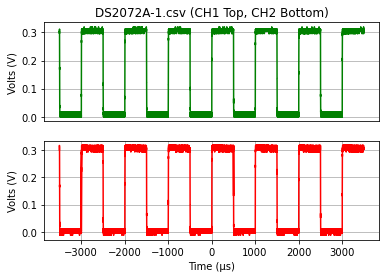

In [11]:
ch = w.channels[0]
plt.subplot(211)
plt.plot(ch.times*1e6, ch.volts, color='green')
plt.title(filename + " (CH1 Top, CH2 Bottom)")
plt.ylabel("Volts (V)")
plt.grid(True)
plt.xticks([])

ch = w.channels[1]
plt.subplot(212)
plt.plot(ch.times*1e6, ch.volts, color='red')
plt.xlabel("Time (µs)")
plt.ylabel("Volts (V)")
plt.grid(True)

plt.show()

## DS2072A-3

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS2072A-3.png" width="40%">


### First the `.csv` data

Let's look at what the accompanying `.csv` data looks like.


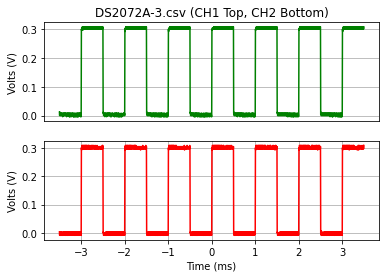

In [12]:
filename = "DS2072A-3.csv"
csv_data = read_rigol_csv(repo+filename)

plt.subplot(211)
plt.plot(csv_data[0]*1e3,csv_data[1], color='green')
plt.title(filename + " (CH1 Top, CH2 Bottom)")
plt.ylabel("Volts (V)")
#plt.ylim(-10,10)
plt.grid(True)
plt.xticks([])

plt.subplot(212)
plt.plot(csv_data[0]*1e3,csv_data[2], color='red')
plt.xlabel("Time (ms)")
plt.ylabel("Volts (V)")
plt.grid(True)
#plt.ylim(-2,2)

plt.show()

### Now for the `wfm` data

First let's have look at the description of the internal file structure. We see that only channel 1 has been enabled.

In [13]:
# raw=true is needed because this is a binary file
wfm_url = repo + "DS2072A-3.wfm" + "?raw=true"  

w = rigol.Wfm.from_url(wfm_url, 'DS2000')
description = w.describe()
print(description)

downloading 'https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS2072A-3.wfm?raw=true'
    General:
        File Model   = wfm2000
        User Model   = DS2000
        Parser Model = wfm2000
        Firmware     = 00.03.05.03.03
        Filename     = DS2072A-3.wfm
        Channels     = [1, 2]

     Channel 1:
         Coupling =       DC
            Scale =   100.00 mV/div
           Offset =    60.00 mV
            Probe =    0.01X
         Inverted =    False

        Time Base =  500.000 µs/div
           Offset =    0.000  s
            Delta =    1.000 ns/point
           Points =  7000000

         Count    = [        1,        2,        3  ...   6999999,  7000000]
           Raw    = [      218,      218,      218  ...       218,      218]
           Times  = [-3.500 ms,-3.500 ms,-3.500 ms  ...  3.500 ms, 3.500 ms]
           Volts  = [304.00 mV,304.00 mV,304.00 mV  ... 304.00 mV,304.00 mV]

     Channel 2:
         Coupling =       DC
            Scale =   100.00 mV/div


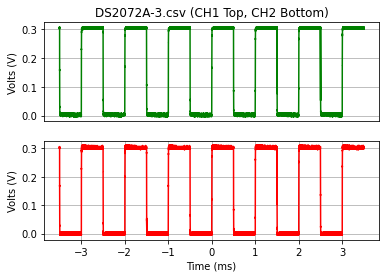

In [14]:
ch = w.channels[0]
plt.subplot(211)
plt.plot(ch.times*1e3, ch.volts, color='green')
plt.title(filename + " (CH1 Top, CH2 Bottom)")
plt.ylabel("Volts (V)")
#plt.ylim(-10,10)
plt.grid(True)
plt.xticks([])

ch = w.channels[1]
plt.subplot(212)
plt.plot(ch.times*1e3, ch.volts, color='red')
plt.xlabel("Time (ms)")
plt.ylabel("Volts (V)")
#plt.ylim(-2,2)
plt.grid(True)

plt.show()